In [14]:
import pandas as pd
import matplotlib.pyplot as plt

In [22]:
data = pd.read_csv("data/nrg_cb_gasm_linear.csv.gz")

In [23]:
data

,DATAFLOW,LAST UPDATE,freq,nrg_bal,siec,unit,geo,TIME_PERIOD,OBS_VALUE,OBS_FLAG
0,ESTAT:NRG_CB_GASM(1.0),30/08/23 23:00:00,M,DL,G3000,MIO_M3,AL,2018-01,0.0,NaN
1,ESTAT:NRG_CB_GASM(1.0),30/08/23 23:00:00,M,DL,G3000,MIO_M3,AL,2018-02,0.0,NaN
2,ESTAT:NRG_CB_GASM(1.0),30/08/23 23:00:00,M,DL,G3000,MIO_M3,AL,2018-03,0.0,NaN
3,ESTAT:NRG_CB_GASM(1.0),30/08/23 23:00:00,M,DL,G3000,MIO_M3,AL,2018-04,0.0,NaN
4,ESTAT:NRG_CB_GASM(1.0),30/08/23 23:00:00,M,DL,G3000,MIO_M3,AL,2018-05,0.0,NaN
...,...,...,...,...,...,...,...,...,...,...
89533,ESTAT:NRG_CB_GASM(1.0),30/08/23 23:00:00,M,VENT,G3000,TJ_GCV,XK,2022-10,0.0,NaN
89534,ESTAT:NRG_CB_GASM(1.0),30/08/23 23:00:00,M,VENT,G3000,TJ_GCV,XK,2022-11,0.0,NaN
89535,ESTAT:NRG_CB_GASM(1.0),30/08/23 23:00:00,M,VENT,G3000,TJ_GCV,XK,2022-12,0.0,NaN
89536,ESTAT:NRG_CB_GASM(1.0),30/08/23 23:00:00,M,VENT,G3000,TJ_GCV,XK,2023-02,0.0,NaN


In [24]:
gbc = data.groupby("geo")

In [25]:
for i, k in gbc: 
    print(i, len(k))

AL 1282
AT 2688
BE 3012
BG 2642
CY 2844
CZ 2622
DE 2584
DK 2735
EE 2513
EL 2605
ES 2702
EU27_2020 2276
FI 2449
FR 2674
GE 1224
HR 2568
HU 2654
IE 2524
IS 444
IT 2653
LT 2558
LU 2499
LV 2590
MD 894
ME 468
MK 2114
MT 2651
NL 2689
NO 2575
PL 2670
PT 2661
RO 2524
RS 1530
SE 2532
SI 2613
SK 3066
TR 2557
UA 454
UK 1834
XK 364


In [26]:
at = gbc.get_group("AT")

In [29]:
at.head(2)

,DATAFLOW,LAST UPDATE,freq,nrg_bal,siec,unit,geo,TIME_PERIOD,OBS_VALUE,OBS_FLAG
62,ESTAT:NRG_CB_GASM(1.0),30/08/23 23:00:00,M,DL,G3000,MIO_M3,AT,2014-01,29.0,NaN
63,ESTAT:NRG_CB_GASM(1.0),30/08/23 23:00:00,M,DL,G3000,MIO_M3,AT,2014-02,28.0,NaN


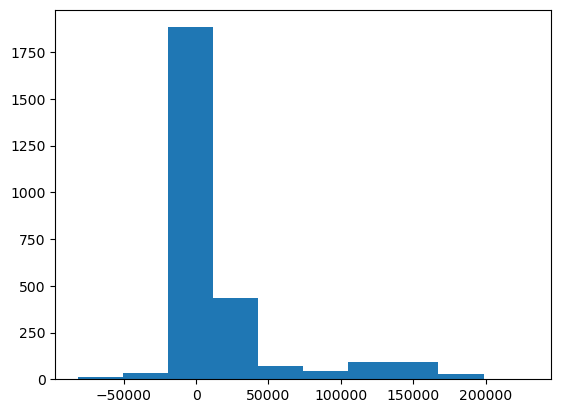

In [28]:
plt.hist(at.OBS_VALUE)
plt.show()

In [30]:
at.nrg_bal.value_counts()

nrg_bal
DL            302
EXP           302
IC_CAL_MG     302
IMP           302
IPRD          302
STK_CHG_MG    302
TI_EHG_MAP    266
IC_OBS        242
STATDIFF       86
TOS            86
FLARE          62
INTMARB        62
VENT           62
STK_CHG_CG      6
FC_IND          2
FC_OTH          2
Name: count, dtype: int64

In [32]:
gb_nrgbal = at.groupby("nrg_bal")

DL


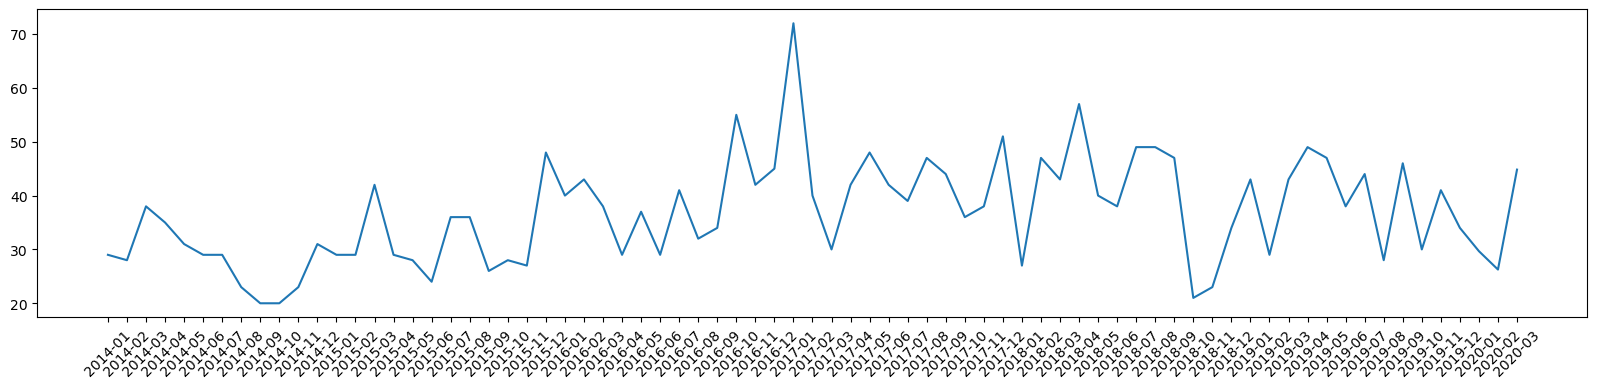

EXP


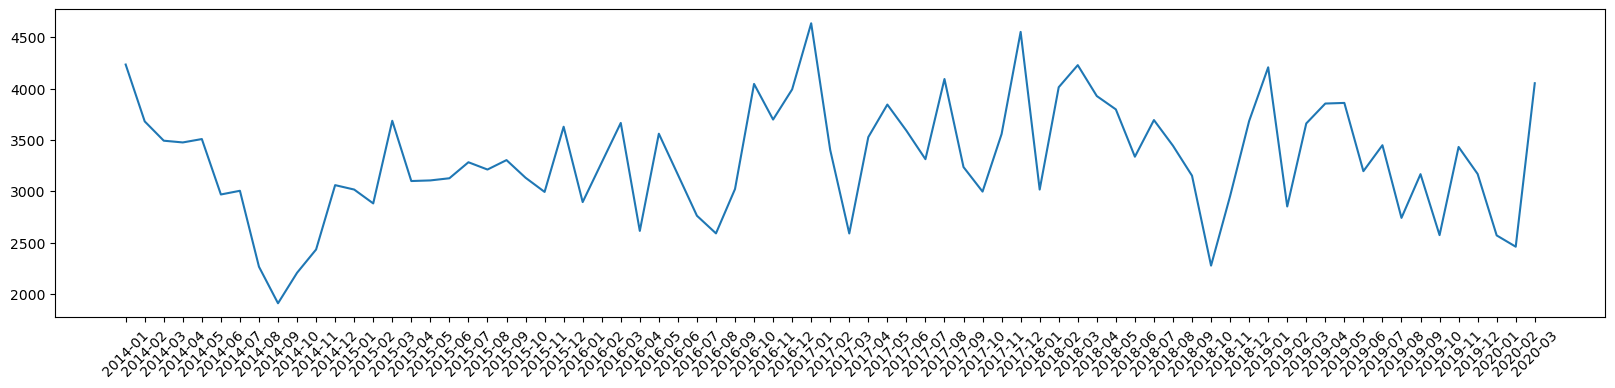

FC_IND


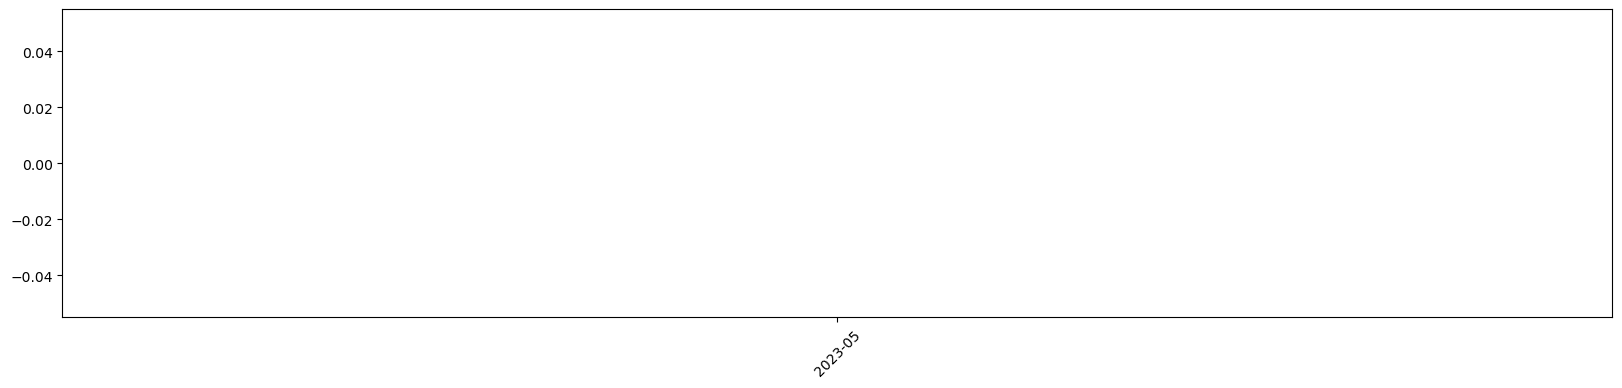

FC_OTH


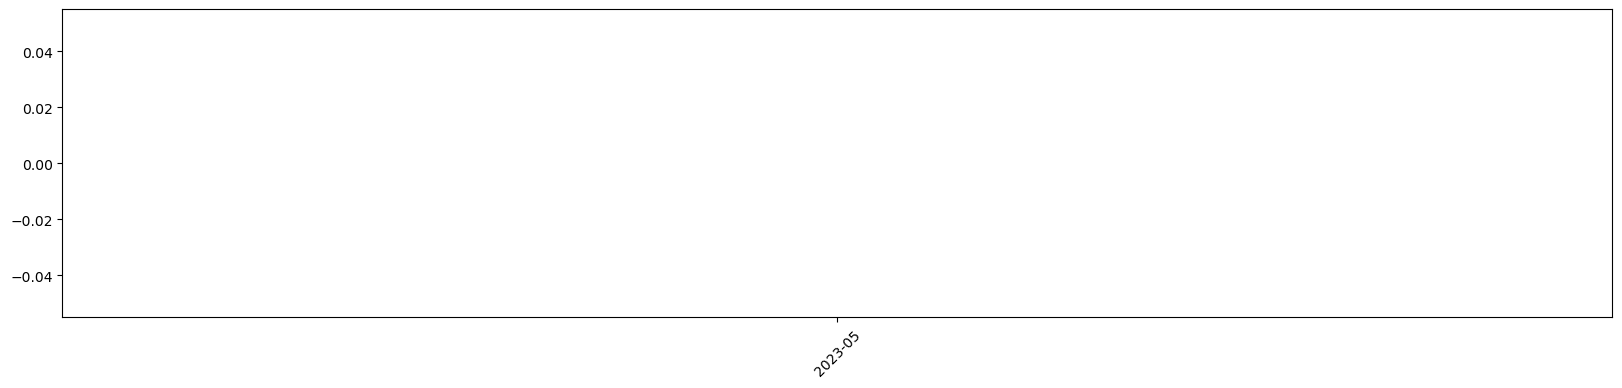

FLARE


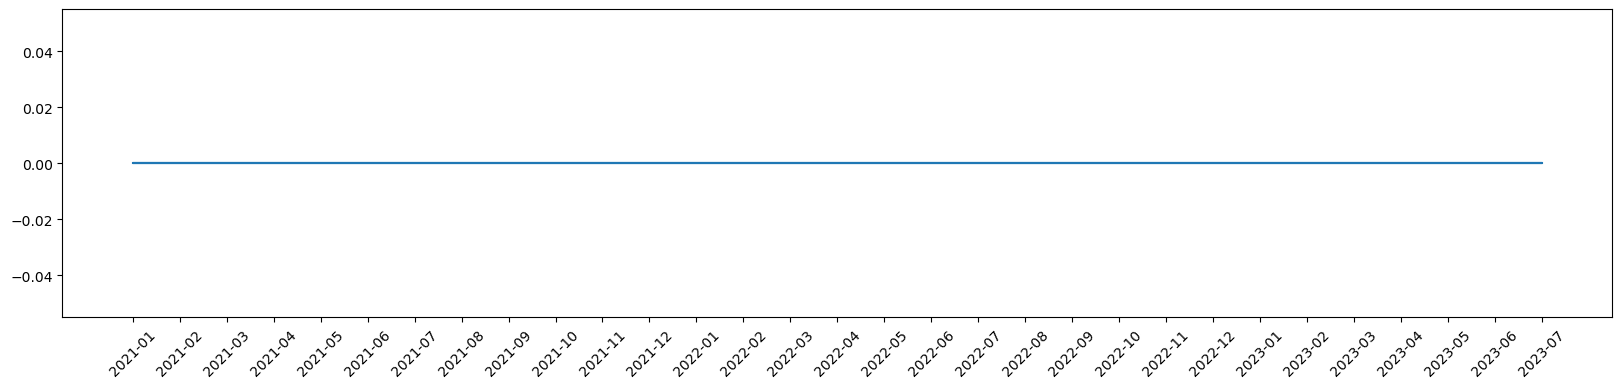

IC_CAL_MG


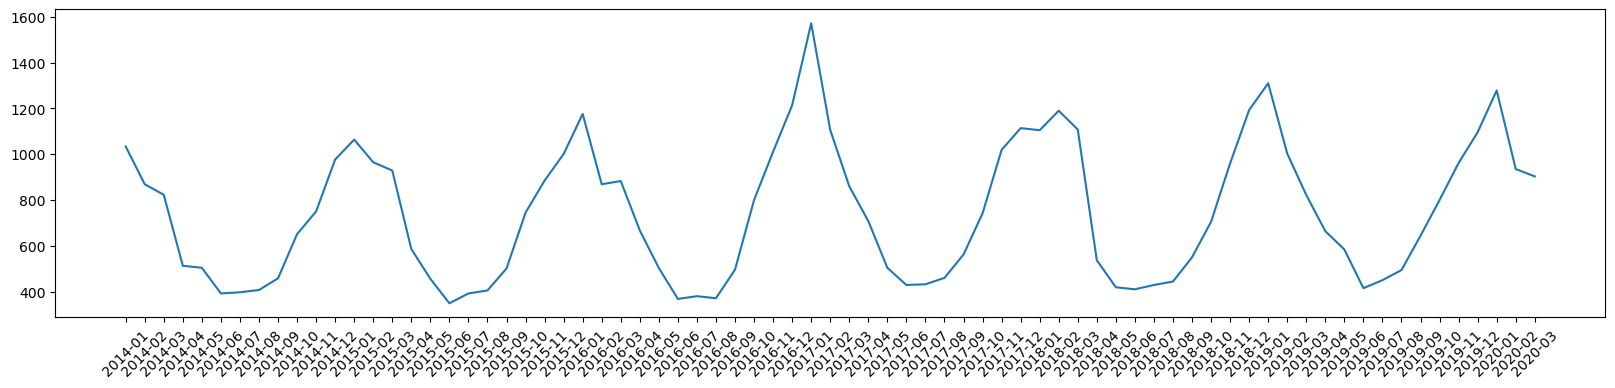

IC_OBS


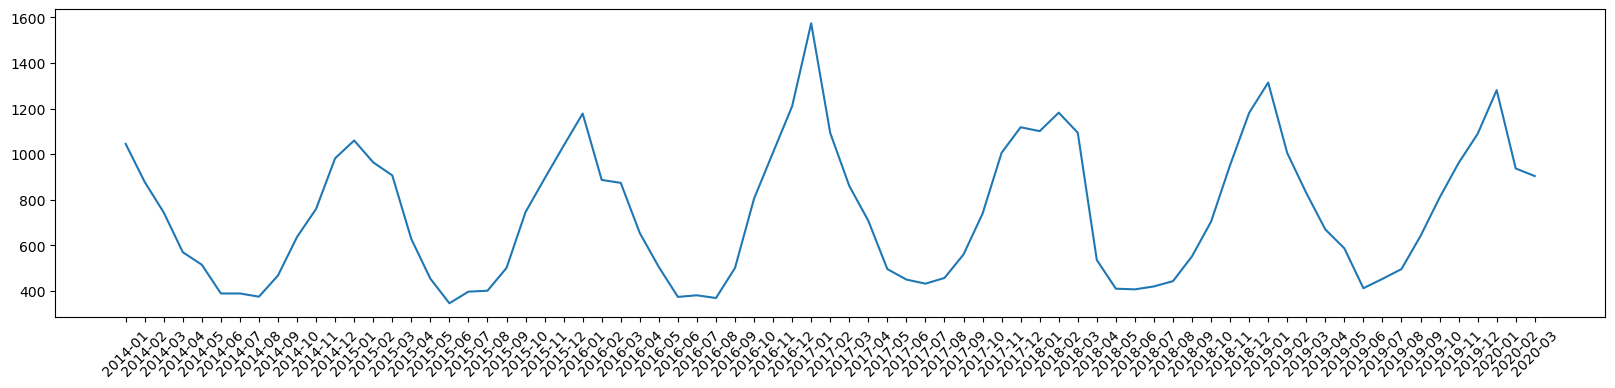

IMP


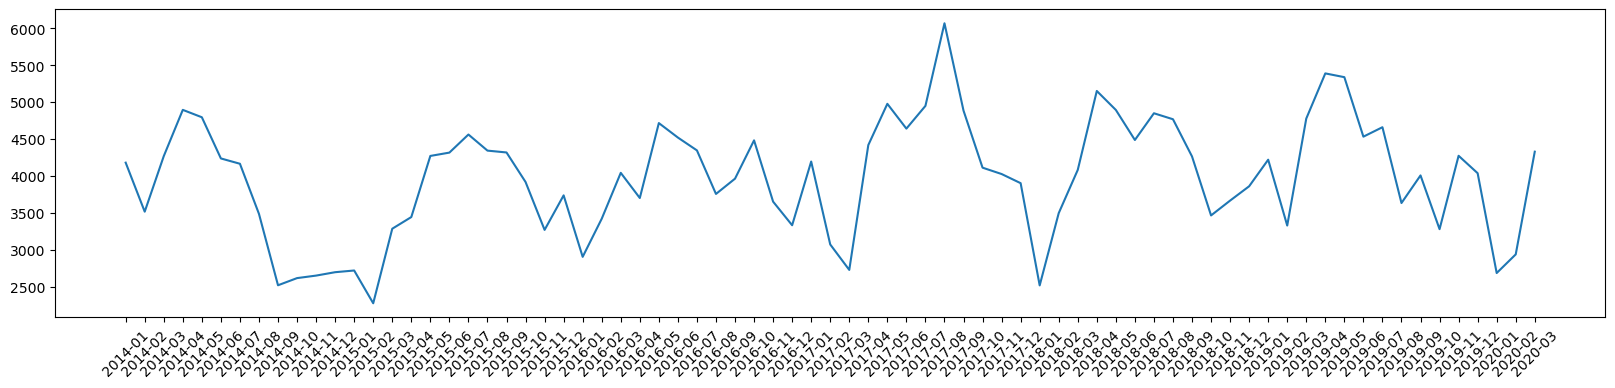

INTMARB


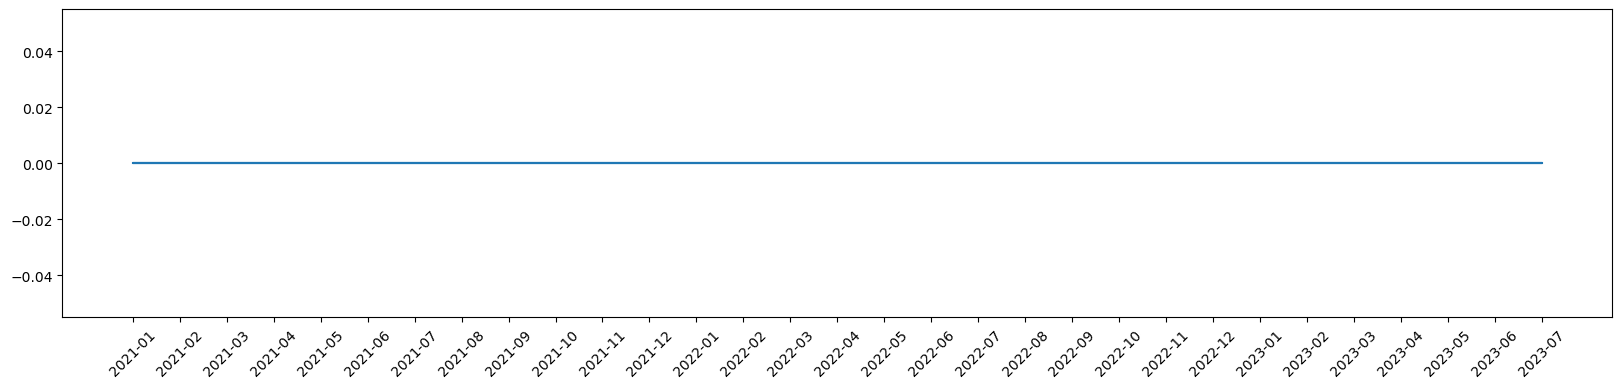

IPRD


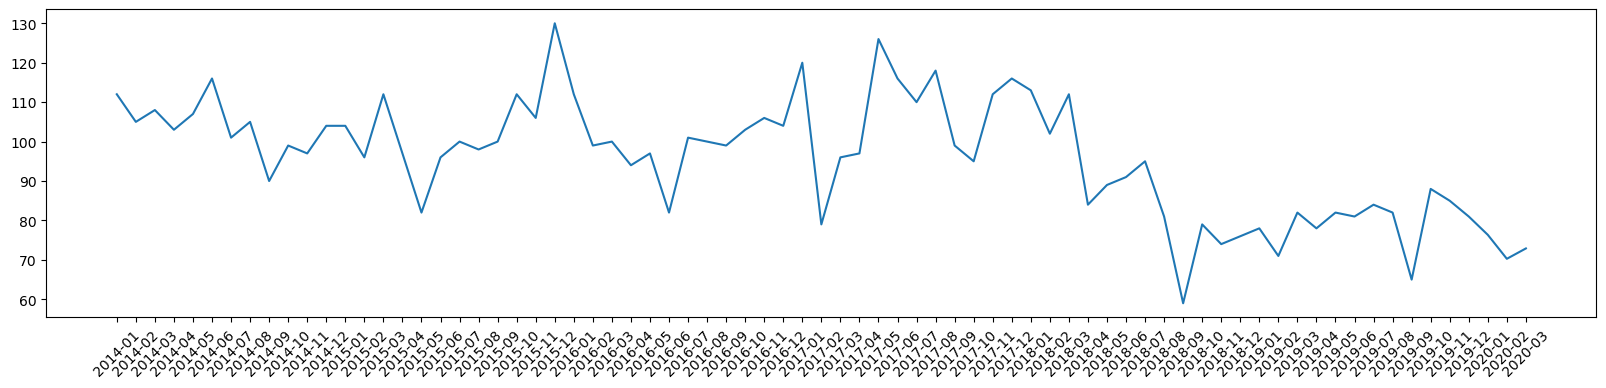

STATDIFF


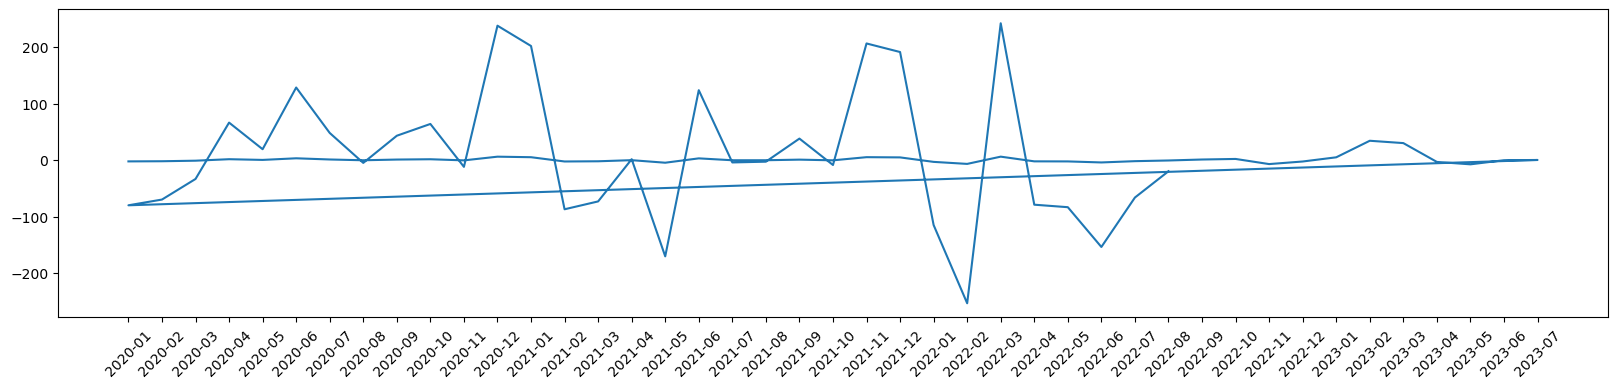

STK_CHG_CG


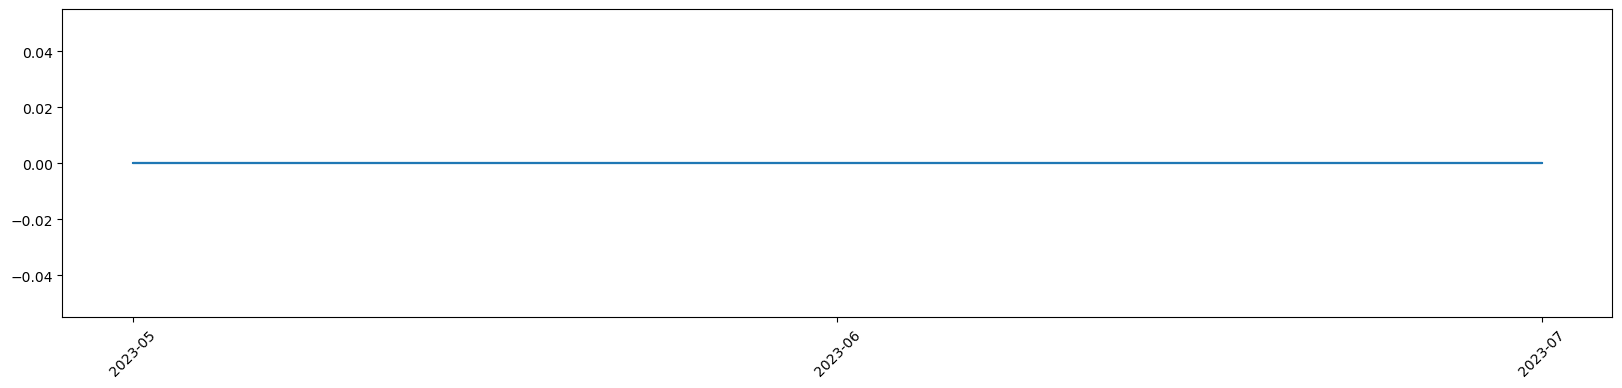

STK_CHG_MG


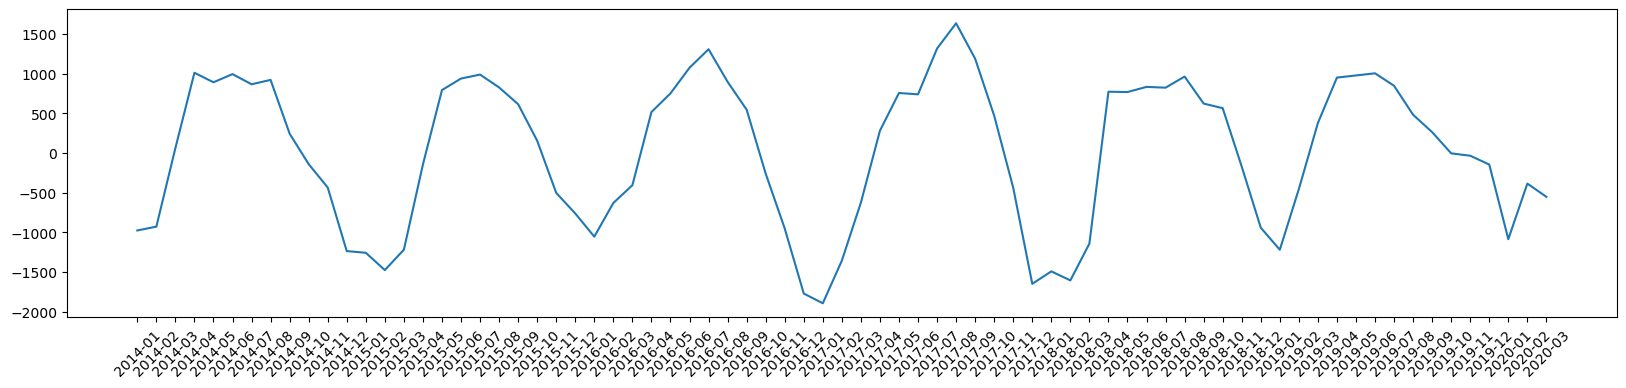

TI_EHG_MAP


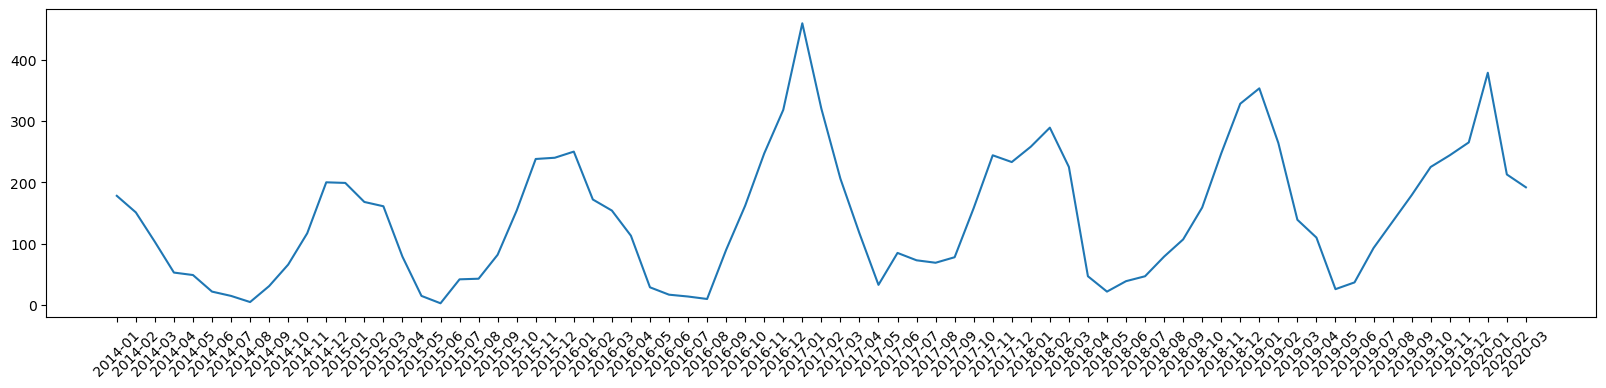

TOS


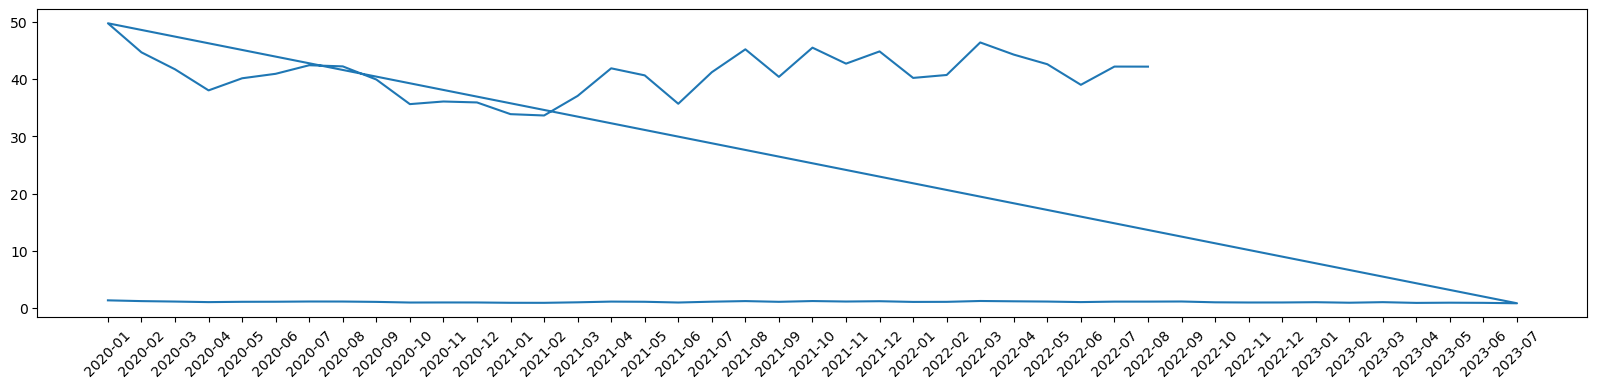

VENT


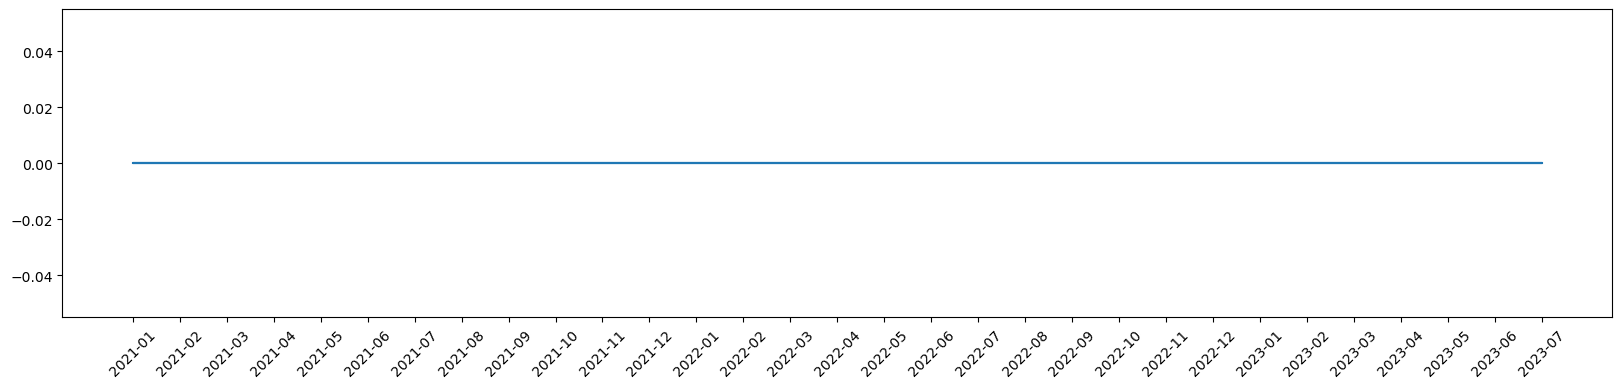

In [33]:
for i, k in gb_nrgbal: 
    print(i)
    timeseries = k[["TIME_PERIOD","OBS_VALUE"]].set_index("TIME_PERIOD")[:75]
    plt.figure(figsize = (20, 4))
    plt.plot(timeseries)
    plt.xticks(rotation = 45)
    plt.show()